#  Demand Forecasting. Part 2. Forecasting Details

## Постановка задачи прогноза спроса

Под спросом понимают различные показатели:
- продажи в деньгах
- продажи в штуках
- что-то еще :)

Что именно прогнозируется зависит от **бизнес-задачи**.
- В прошлой и текущей тетрадке - это продажи в деньгах за неделю в одном отделе супермаркета. 
- В моем опыте спрос формализовался как количество чеков и оборот за 7 дней одного пользователя.
- Часто в коммерции прогнозируют спрос на товар в штуках/единицах измерения товара на 1  / 7 / 21 дней

Решать задачу прогноза спроса можно **разными подходами**:
- использовать аппарат машинного обучения
- использовать инструментарий временных рядов

Критерием выбора подхода - **качество полученного решения**.

##  Прогноз спроса как задача машинного обучения

Машинное обучение оперирует понятиями **объекта $x$** и **таргета $y$**:
- **таргет $y$** - величина, которую мы прогнозируем. В этой тетрадке - продажи в деньгах на следующей неделе
- **объект $x$** - сущность, для которой прогнозируем таргет. В этой тетрадке - отдел супермаркета.

Объект $x$ не может быть абстракцией, поэтому любой объект представляется в виде набора чисел (вектора, если быть точными) - **признаков** (features), или характеристик объекта: **$x = (f_1, f_2, ..., f_n)$** В нашем примере сразу доступно признаковое описание объектов - см. секцию "Данные"

Далее, мы стремимся найти **алгоритм $a(x)$**, или модель, или формулу, который свяжет признаки объекта с таргетом: $$y \approx a(x)$$

Некоторые алгоритмы простые, некоторые - сложные, суть от этого не меняется :)

Мы работаем с задачей регрессии!

- **регрессия** - класс задач, где мы учимся прогнозировать числа
- **классификация** - класс задач, где мы учимся прогнозировать принадлежность объекта к категории (купит / не купит, отток / не отток, фрод / не фрод)

##  Метрики регрессии

Первой метрикой, с которой мы познакомимся, будет **MAE (mean absolute error)**, средняя абсолютная ошибка. Она вычисляется следующим образом: 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$

Если мы спрогнозировали, что нужно 20кг огурцов, а на самом деле 10, мы ошиблись на |10 - 20| = 10 кг. Средняя абсолютная ошибка - это среднее кол-во кг, на которые мы ошиблись. 

Второй метрикой является **MSE (mean squared error)**, средняя квадратичная ошибка. Она вычисляется как 

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

Смысл этой ошибки в том, чтобы штрафовать за большие ошибки сильнее, чем за маленькие. Если мы ошиблись на 5 кг, то в ошибку войдёт 25. Если мы ошиблись на 10 кг, то в ошибку войдёт 100. Чем выше ошибка, тем сильнее штраф. 

$$ RMSE = MSE ** 1 /2 $$


Часто для нас принципиальным является не то, на сколько мы ошиблись, а то на сколько процентов мы ошиблись. Метрика, которая отлавливает процентную ошибку, называется **MAPE (mean absolute percentage error)**, средняя абсолютная процентная ошибка. 

$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$

Она часто применяется в следующих задачах: например, вы прогнозируете спрос, и вам принципиально, на сколько процентов вы ошиблись, а не абсолютное значение. Если вы предсказали  один, а в реальности было  десять - это не то же самое, что вы предсказали  тысяча, а в реальности было  тысяча  девять. С точки зрения МАЕ или MSE, это две совершенно одинаковые ошибки. А если вас интересует, сколько в среднем на сколько процентов вы ошибаетесь, то это отражает МАРЕ.


Качество построенной регрессии измеряется **коэффициентом детерминации**
$R^2$. Он отражает то, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели:

$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$


### Данные исходные
Для демонстрации работы библиотеки используем датасет про [Walmart](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting). Есть информация о 45 магазинах, расположенных в разных регионах. Каждый магазан содержит несколько отделов. Наша задача спрогнозировать продажи по каждому отделу для каждого магазина. 


* `Weekly_Sales` - объём продаж в данную неделю в данном отделе (целевая переменная)
* `Store` - номер магазина;
* `Type` - тип магазина;
* `Size` - размер магазина;
* `Dept` - номер отдела;
* `Date` - дата;
* `IsHoliday` - является ли неделя праздничной;

В Walmart работает несколько акций по уценке товаров. Эти уценки обычно связаны с праздниками: Суперкубок, день Труда, день Благодарения, Рождество. С этими периодами нужно быть аккуратным. Продажи в эти дни аномальны, при этом наблюдений, связанных с этими аномалиями довольно мало.

Для удобства вот информация о всех праздниках, попавших в датасет: 

```
Суперкубок: 12-Фев-10, 11-Фев-11, 10-Фев-12
День Труда: 10-Сен-10, 9-Фев-11, 7-Сен-12
День Благодарения: 26-Ноя-10, 25-Ноя-11, 23-Ноя-12
Рождество: 31-Дек-10, 30-Дек-11, 28-Дек-12
```

* `Temperature` - средняя температура в регионе в градусах по Фаренгейту;
* `Fuel_Price` - стоимость топлива в регионе;
* `MarkDown1-5` - данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в опен сорс.  
* `CPI` - индекс потребительских цен.
* `Unemployment` - уровень безработицы.

### Данные после препроцессинга:



* `future_Sales` - объём продаж в следующую неделю в данном отделе;
* `Weekly_Sales` - объём продаж в данную неделю в данном отделе;
* `Store` - номер магазина, трансформированы в 44 дамми-переменных;
* `Type` - тип магазина, трансформированы в 2 дамми-переменных;
* `Size` - размер магазина;
* `Dept` - номер отдела, трансформированы в 97 дамми-переменных;
* `Month_i` - дамми-переменная месяца;
* `'Black_Friday'`: бинарная переменная, соответствующая черным пятницам;
* `'Pre_christmas'`: бинарная переменная, соответствующая предрождественским неделям;
* `IsHoliday` - является ли неделя праздничной;
* `Temperature` - средняя температура в регионе в градусах по Фаренгейту;
* `Fuel_Price` - стоимость топлива в регионе;
* `MarkDown1-5` - данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в опен сорс.  
* `CPI` - индекс потребительских цен.
* `Unemployment` - уровень безработицы.

### Загрузка данных

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# функция, которая считает метрики и выводит их на экран
def print_metrics(y_test, y_pred):
    print('MAE:', mae(y_test, y_pred))
    print('RMSE:', np.sqrt(mse(y_test, y_pred)))
    print('R2', r2_score(y_test, y_pred))

    pass

In [ ]:
df = pd.read_csv('walmart_preproc.csv')
df.head()

### Разбиение данных

In [ ]:
y = df['future_sales']
X = df.drop(['future_sales'], axis=1)

In [ ]:
var_real = ['MarkDown1','MarkDown2', 'MarkDown3',
            'MarkDown4','MarkDown5', 'CPI', 'Unemployment', 
            'Temperature', 'Fuel_Price','Size']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

In [ ]:
# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(X_train[var_real]) 

In [ ]:
# Применяем скалировщик к трэйну
X_train_scale = scaler.transform(X_train[var_real])

# Применяем скалирвощик к тесту 
X_test_scale = scaler.transform(X_test[var_real])

In [ ]:
# Заменяем значения на проскалированные 
X_train[var_real] = X_train_scale
X_test[var_real] = X_test_scale

##  Алгоритмы регрессии и важные аспекты

### Наивный прогноз

In [ ]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им продажи
y_pred_naive[:5]

In [ ]:
# та самая функция, которую мы сделали в самом начале тетрадки
print_metrics(y_test, y_pred_naive)

In [ ]:
plt.scatter(y_test, y_pred_naive)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

### Линейная регрессия

Пришло время построить линейную регрессию! Эта модель говорит, что объём продаж формируется в результате суммирования тех характеристик, которыми обладает магазин с какими-то весами

$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$

Например, если мы оценили модель и у нас получилось, что 

$$ sales = 10000 + 20 \cdot t,$$

то это означает, что средний объём продаж равен 10 тыс. рублей. При этом каждый дополнительный градус температуры на улице в среднем при прочих равных увеличивает объёмы продаж на 20 рублей. 

Для того, чтобы подобрать коэффициенты обычно минимизируют MSE.

In [ ]:
# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [ ]:
print_metrics(y_test, y_pred_regr)

In [ ]:
plt.scatter(y_test, y_pred_regr)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Иногда может быть интересным посмотреть на коэффициенты $\beta_0,  \beta_1 x_1, ..., \beta_n$ обученной модели
$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$



In [ ]:
print(model_regression.coef_)

In [ ]:
feature_names = df.drop('future_sales', axis=1).columns
featureImportance = pd.DataFrame({"feature": feature_names,  "importance": model_regression.coef_})
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance.head()

In [ ]:
featureImportance["importance"].plot(kind='bar', figsize=(12,5));
plt.xticks(ticks=range(featureImportance.shape[0]), labels=list(featureImportance["feature"]))
plt.show()

### Кросс-валидация



Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели. Чаще всего это делается одним из 2 способов:


* отложенная выборка __(held-out/hold-out set).__ При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели. Сейчас мы сделали именно так. У этого подхода есть минусы. Результат работы модели может сильно зависеть от конкретного разбиения. Хочется убрать эту зависимость. Для этого используют кросс-валидацию. 

* кросс-валидация __(cross-validation, на русский еще переводят как скользящий или перекрестный контроль).__ Тут самый частый случай – K-fold кросс-валидация



<img src="https://hsto.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png" height="600" width="600"> 


Модель обучается $K$ раз на разных подвыборках исходной выборки (белый цвет), а проверяется на одной подвыборке (каждый раз на разной, оранжевый цвет). Получаются $K$ оценок качества модели, которые обычно усредняются, выдавая среднюю оценку качества классификации/регрессии на кросс-валидации. 

Кросс-валидация дает лучшую, по сравнению с отложенной выборкой, оценку качества модели на новых данных. Но кросс-валидация вычислительно дорогостоящая, если данных много.
 
Кросс-валидация – очень важная техника в машинном обучении, с ее помощью выбираются гиперпараметры моделей, сравниваются модели между собой, оценивается полезность новых признаков в задаче и т.д.

In [ ]:
model = LinearRegression()

mse_val = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
(np.sqrt(-1*mse_val))

In [ ]:
(np.mean(np.sqrt(-1*mse_val)))

### Регуляризация

Теперь мы умеем оценивать линейную регрессию и смотреть на её качество по кросс-валидации. Пришло время переходить к более сложным моделям. Давайте посмотрим на Lasso-регрессию. Для начала просто оценим её. Потом уже будем смотреть на то, чем она лучше обычной. 

In [ ]:
# Объявили модель с alpha = 10
model_lasso = Lasso(alpha=10, random_state=42)

# Обучили
model_lasso.fit(X_train, y_train)

# применили
y_pred_lasso = model_lasso.predict(X_test)

In [ ]:
print_metrics(y_test, y_pred_lasso)

In [ ]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Отлично! Давайте теперь найдём качество модели на кросс-валидации. 

In [ ]:
model = Lasso(alpha=10, random_state=42)
mse_val_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_val_score
(np.mean(np.sqrt(-1*mse_val_score)))

Посмотрим на коэффициенты модели. 

In [ ]:
model_lasso.coef_

Огромное количество нулей. Как так получилось?  Дело в том, что Lasso-регрессия отличается от обычной специальным штрафом: __регуляризацией.__ Модели часто страдают таким недугом, как переобучение. 

![](https://cdn-ssl-devio-img.classmethod.jp/wp-content/uploads/2015/05/mlconcepts_image51.png)

В случае регрессии это выражается в том, что линия, которую мы проводим, слишком подробно вылизывает точки пространства. На самой правой каритинке именно это и произошло. Для того, чтобы так подробно опутать точки, регрессии надо делать очень резкие повороты. Для резких поворотов ей необходимы большие коэффициенты. 

Получается, что если мы хотим избежать резких поворотов, и значит, переобучения, нам нужно накладывать на коэффициенты специальные штрафы, которые не дадут им становиться очень-очень большими. Как можно оштрафовать коэффициенты за их размер? Очень просто. Давайте возьмём нашу функцию ошибки, $MSE$, и прибавим к ней дополнительное слагаемое. 

$$MSE + \alpha \cdot \sum |\beta|.$$ 

Теперь мы будем минимизировать не просто квадрат ошибки, а квадрат ошибки плюс сумму модулей коэффициентов. Этот приём не даст нашей модели переобучится. 

Обратите внимание, что штраф мы вносим с весом $\alpha$. Если взять $\alpha = 1000$, то мы говорим, что очень сильно хотим штрафовать коэффициенты за их размер. Если мы берём $\alpha = 1$, мы говорим, что хотим внести мааааааленький штраф. В нашем случае штраф получился равен $100$. Оказалось, что это довольно много и огромное число коэффициентов занулилось. Качество модели упало. 

Кроме модулей коэффициентов, можно добавлять штраф из квадратов коэффициентов 

$$MSE + \alpha \cdot \sum \beta^2.$$ 

Такая модель называется redge-регрессией (гребневой регрессией).

$\alpha$ - это **гиперпараметр** модели, то, что в процессе обучения мы не настроим, поэтому мы вынуждены перебирать значения и находить лучшее.

In [ ]:
%%time

# Решётка для перебора параметра 
param_grid = {'alpha':  [0.01, 0.05, 0.1,  0.8, 1,10]}

# Объявили модель 
model_lasso = Lasso(random_state=42) 

# Объявили перебор, cv=5 это количество фолдов для валидации
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 3, scoring='neg_mean_squared_error')

# обучаем решётку
grid_cv_lasso.fit(X_train, y_train)

Перебор работает очень долго. Для каждого `alpha` нам надо учить `cv` моделей. Всего получается в нашей ситуции учится $6 \cdot 3 = 18$ моделей. Параметров для перебора в моделях бывает много. Обычно поиск по решётке используют в случае $1,2$, ну максимум $3$ параметров.

In [ ]:
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)
print('Лучшее качество:', np.sqrt(-1*grid_cv_lasso.best_score_))

In [ ]:
model_lasso = grid_cv_lasso.best_estimator_

# Сделали прогнозы
y_pred_lasso = model_lasso.predict(X_test)

In [ ]:
np.sqrt(mse(y_test, y_pred_lasso))

Лучшее `alpha` оказалось очень маленьким. Значит модели не нужна регуляризация. Это хорошая новость.

## Регрессионное дерево

Принцивы построения регресионного дерева:

1) Поместить все данные в корневую вершину
2) Повторять до критерия останова процедуру разбиения на вершины.

Процедура разбиения дерева на вершины:
1) Найти самый информативный признак, по которому разбиение данных даст наименьшую ошибку
2) Разветвить дерево
3) Повторить


Критерии останова:
- длина дерева
- кол-во объектов в финальном узле
- ...

<img src='https://www.oreilly.com/api/v2/epubs/9781449369880/files/assets/malp_0401.png'>

<img src='https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0604.png'>

- **criterion** {“gini”, “entropy”}, default=”gini” <br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

- **splitter**: {“best”, “random”}, default=”best” <br>
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth**: default=0 <br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- **min_samples_split**: int or float, default=2 <br>
The minimum number of samples required to split an internal node:

- **min_samples_leaf**: int or float, default=1 <br>
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

- **max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None <br>
The number of features to consider when looking for the best split:

- **max_leaf_nodes**: int, default=None <br>
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

- **min_impurity_decrease**: float, default=0.0 <br>
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- **min_impurity_split**: float, default=0 <br>
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

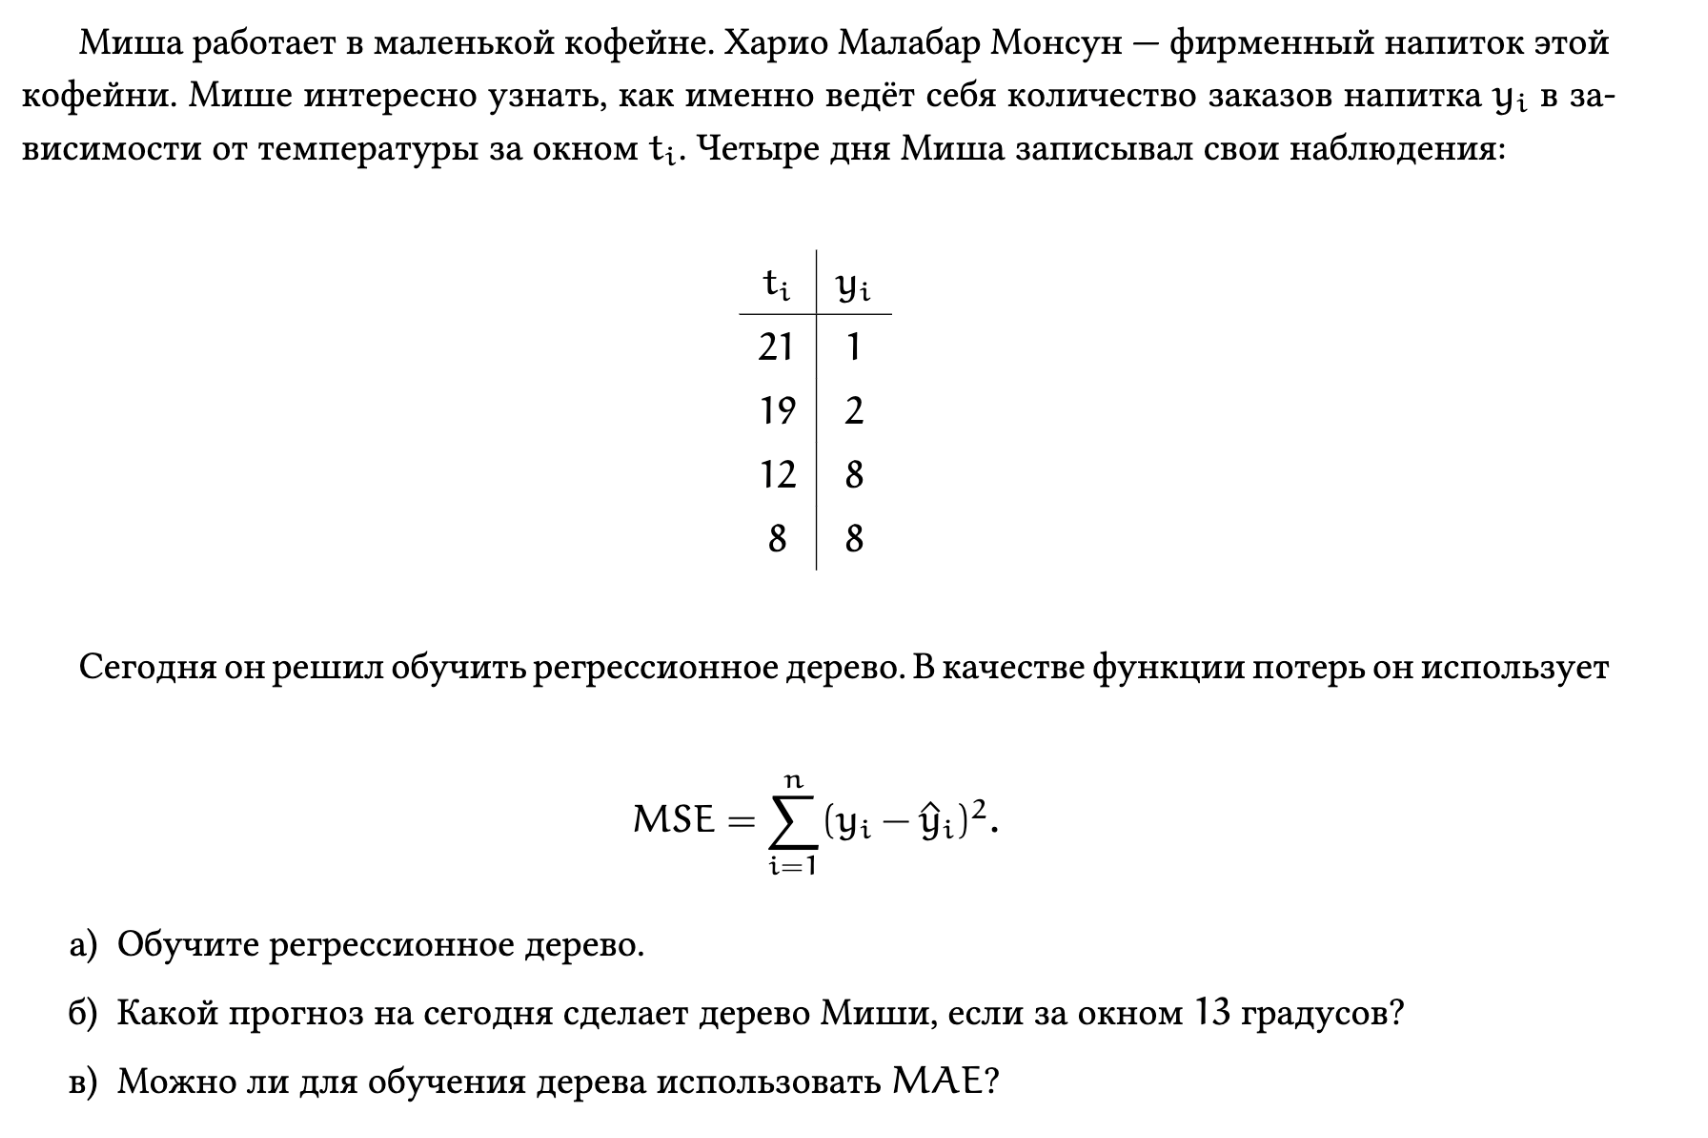

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor

# объявим дерево
dt = DecisionTreeRegressor(random_state=42)
# обучим дерево
dt.fit(X_train, y_train)

# Сделали по дереву  прогнозы 
y_pred_tree = dt.predict(X_test)

In [ ]:
print_metrics(y_test, y_pred_tree)

In [ ]:
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
# место для экспериментов с гиперпараметрами дерева


## Случайный лес

<img src='https://favtutor.com/resources/images/uploads/mceu_18984255451608651954125.jpg'>

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Объявили лес из 10 деревьев 
rf = RandomForestRegressor(n_estimators=10, random_state=42)
# Обучили лес 
rf.fit(X_train, y_train)

# Сделали по лесу прогнозы 
y_pred_forest = rf.predict(X_test)

In [ ]:
print_metrics(y_test, y_pred_forest)

##  Прогноз спроса через временные ряды

Материалы взяты из [урока](https://www.dmitrymakarov.ru/intro/time-series-20/)

Временной ряд – это последовательность значений, описывающих протекающий во времени процесс, измеренных в последовательные моменты времени, обычно через равные промежутки.

Строго говоря, мы до этого момента имели дело с временными рядами, и прогнозировали через модели машинного обучения.
В реальности почти всегда выбор за моделями машинного обучения, в частности, бустингами; они показывают лучшее качество.

Тем не менее, в библиотеке stat_models можно найти много полезного для работы с временными рядами.
Т.к. в версии для машинного обучения я удалила колонку даты, подгрузим исходный, нетронутый датасет :)

In [ ]:
df_old = pd.read_csv('walmart.csv', sep='\t')

In [ ]:
weekly_sales = pd.DataFrame(df_old.groupby('Date')['Weekly_Sales'].sum())

In [ ]:
weekly_sales.plot(figsize=(15,5));

### Скользящее среднее

In [ ]:
weekly_sales.rolling(window = 4).mean()

In [ ]:
weekly_sales.rolling(window = 4).mean().plot(figsize=(15,5));

### Разложение на компоненты

- Тренд — долгосрочное изменение уровня ряда
- Сезонность предполагает циклические изменения уровня ряда с постоянным периодом
- Случайные колебания — непрогнозируемое случайное изменение ряда


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
tdi = pd.DatetimeIndex(weekly_sales.index)
weekly_sales.set_index(tdi, inplace=True)

In [ ]:
decompose = seasonal_decompose(weekly_sales)
decompose.plot()

plt.show()

### Стационарность

Стационарность (stationarity) временного ряда как раз означает, что такие компоненты как тренд и сезонность отсутствуют. Говоря более точно, среднее значение и дисперсия не меняются со смещением во времени.

Стационарность можно оценить визуально по графикам. Или применить тест Дики-Фуллера (Dickey-Fuller test).
Система гипотез теста:

- Нулевая гипотеза предполагает, что процесс нестационарный
- Альтернативная гипотеза соответственно говорит об обратном

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
adf_test = adfuller(weekly_sales['Weekly_Sales'])
 
# выведем p-value
print('p-value = ' + str(adf_test[1]))

### Автокорреляция

Автокорреляция  показывает степень взаимосвязи в диапазоне от –1 до 1, как и корреляции, но только не двух переменных, а одной и той же переменной в разные моменты времени.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
 
# применим функцию к нашему набору данных
plot_acf(weekly_sales, alpha = None)
plt.show()

### Экспоненциальное сглаживание

В модели экспоненциального сглаживания (exponential smoothing) или экспоненциального скользящего среднего берем все предыдущие значения и задаем каждому из наблюдений определенный вес и (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.

$$\hat{y}_{t+1} = \alpha \cdot y_t + (1-\alpha) \cdot \hat{y}_{t}$$

In [ ]:
alpha = 0.2
 
# первое значение совпадает со значением временного ряда
exp_smoothing = [weekly_sales['Weekly_Sales'][0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(weekly_sales['Weekly_Sales'])):
    exp_smoothing.append(alpha * weekly_sales['Weekly_Sales'][i] + (1 - alpha) * exp_smoothing[i - 1])

#выведем прогнозное значение последней недели
exp_smoothing[-1]

In [ ]:
weekly_sales.plot(figsize=(15,5));
sns.lineplot(exp_smoothing, label='exponential smoothing')

### Модель ARMA

<img src='https://www.dmitrymakarov.ru/wp-content/uploads/2021/10/ARMA-1024x559.jpg'>

Авторегрессия (autoregressive model, AR) — это регрессия ряда на собственные значения в прошлом. Другими словами, наши признаки в модели обычной регрессии мы заменяем значениями той же переменной, но за предыдущие периоды.

Когда мы прогнозируем значение в период t с помощью данных за предыдущий период (AR(1)), уравнение будет выглядеть следующим образом.

$$ y_t = c + \varphi  \cdot y_{t-1}$$

где $c$ — это константа,  $ \varphi$ — вес модели, $y_{t–1}$ — значение в период $t – 1$.

То, сколько предыдущих периодов использовать определяется параметром p. Обычно записывается как AR(p).


Модель скользящего среднего (moving average, MA) помогает учесть случайные колебания или отклонения (ошибки) истинного значения от прогнозного. Можно также сказать, что модель скользящего среднего — это авторегрессия на ошибку.

$$ y_t = \mu + \varphi \cdot \varepsilon_{t-1} $$

где $\mu$ — это среднее значение временного ряда,  $ \varphi$ — вес модели, $y_{t–1}$ — значение в период $t – 1$.

Такую модель принято называть моделью скользящего среднего с параметром q = 1 или MA(1). Разумеется, параметр q может принимать и другие значения (MA(q)).

Модель ARMA с параметрами (или как еще говорят порядками, orders) p и q или ARMA(p, q) позволяет описать любой стационарный временной ряд.


ARMA предполагает, что в данных отсутствует тренд и сезонность (данные стационарны). Если данные нестационарны, нужно использовать более сложные версии этих моделей:

- ARIMA, здесь добавляется компонент Integrated (I), который отвечает за удаление тренда (сам процесс называется дифференцированием); и
- SARIMA, эта модель учитывает сезонность (Seasonality, S)
- SARIMAX включает еще и внешние или экзогенные факторы (eXogenous factors, отсюда и буква X в названии), которые напрямую не учитываются моделью, но влияют на нее.


Параметров у модели SARIMAX больше. Их полная версия выглядит как SARIMAX(p, d, q) x (P, D, Q, s). В данном случае, помимо известных параметров p и q, у нас появляется параметр d, отвечающий за тренд, а также набор параметров (P, D, Q, s), отвечающих за сезонность.

In [ ]:
print(len(weekly_sales))

In [ ]:
train = weekly_sales[:121]
test = weekly_sales[120:]

In [ ]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
 
# заголовок и подписи к осям
plt.title('Разделение на обучающую и тестовую выборки')
plt.ylabel('Продажи')
plt.xlabel('Недели')
 
# добавим сетку
plt.grid()
 
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# создадим объект этой модели
model = SARIMAX(train)
 
# применим метод fit
result = model.fit()

In [ ]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
 
# и закончится в конце тестового
end = len(train) + len(test) - 1
  
# применим метод predict
predictions = result.predict(start, end)
predictions

In [ ]:
# технические правки, чтобы отрисовать все на одном графике
predictions = pd.DataFrame(list(predictions)).rename(columns={0:'values'})
predictions.set_index(test.index, inplace=True)

In [ ]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(predictions, color = "green")

 
# заголовок и подписи к осям
plt.title('Ряд и прогнозы')
plt.ylabel('Продажи')
plt.xlabel('Недели')
 
plt.show()

In [ ]:
predictions.columns

In [ ]:
np.sqrt(mse(test['Weekly_Sales'], predictions['values']))

### Статьи о моделях спроса в компаниях

https://habr.com/ru/companies/samokat_tech/articles/698118/

https://habr.com/ru/companies/sbermarket/articles/679792/